# Load the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Load the Dataset

In [ ]:
emails_df = pd.read_csv('/content/spam_email_dataset.csv', encoding='latin1')
display(emails_df.head())

,Subject,Body,Spam Label
0,Exclusive Loan Offer  Get Instant Approval,Alert!\n\nYour computer has been infected with...,1
1,Meeting Agenda for Tomorrow,"Dear Student,\n\nThis is a reminder about your...",0
2,Quarterly Sales Report Attached,"Hey,\n\nIm sharing the travel itinerary for o...",0
3,Exclusive Loan Offer  Get Instant Approval,"Dear Investor,\n\nDon't miss this incredible i...",1
4,"Win $1,000,000 Now  Limited Time Offer!","Dear Customer,\n\nWe are giving away free holi...",1


# View the info and descriptive statistics of the DataFrame

In [ ]:
emails_df.info()
display(emails_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Subject     1500 non-null   object
 1   Body        1500 non-null   object
 2   Spam Label  1500 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 35.3+ KB


,Spam Label
count,1500.000000
mean,0.666667
std,0.471562
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


# Convert all email text to lowercase to maintain consistency

In [ ]:
emails_df['Subject'] = emails_df['Subject'].str.lower()
emails_df['Body'] = emails_df['Body'].str.lower()

display(emails_df.head())

,Subject,Body,Spam Label
0,exclusive loan offer  get instant approval,alert!\n\nyour computer has been infected with...,1
1,meeting agenda for tomorrow,"dear student,\n\nthis is a reminder about your...",0
2,quarterly sales report attached,"hey,\n\nim sharing the travel itinerary for o...",0
3,exclusive loan offer  get instant approval,"dear investor,\n\ndon't miss this incredible i...",1
4,"win $1,000,000 now  limited time offer!","dear customer,\n\nwe are giving away free holi...",1


# Remove punctuation, special characters, and extra whitespace from the 'Subject' and 'Body' columns

In [ ]:
import re

emails_df['Subject'] = emails_df['Subject'].str.replace(r'[^\w\s]', '', regex=True)
emails_df['Body'] = emails_df['Body'].str.replace(r'[^\w\s]', '', regex=True)

emails_df['Subject'] = emails_df['Subject'].str.replace(r'\s+', ' ', regex=True).str.strip()
emails_df['Body'] = emails_df['Body'].str.replace(r'\s+', ' ', regex=True).str.strip()

display(emails_df.head())

,Subject,Body,Spam Label
0,exclusive loan offer get instant approval,alert your computer has been infected with a d...,1
1,meeting agenda for tomorrow,dear student this is a reminder about your upc...,0
2,quarterly sales report attached,hey im sharing the travel itinerary for our up...,0
3,exclusive loan offer get instant approval,dear investor dont miss this incredible invest...,1
4,win 1000000 now limited time offer,dear customer we are giving away free holiday ...,1


# Split the text into words

In [ ]:
emails_df['Subject_tokens'] = emails_df['Subject'].apply(lambda x: x.split())
emails_df['Body_tokens'] = emails_df['Body'].apply(lambda x: x.split())

display(emails_df.head())

,Subject,Body,Spam Label,Subject_tokens,Body_tokens
0,exclusive loan offer get instant approval,alert your computer has been infected with a d...,1,"[exclusive, loan, offer, get, instant, approval]","[alert, your, computer, has, been, infected, w..."
1,meeting agenda for tomorrow,dear student this is a reminder about your upc...,0,"[meeting, agenda, for, tomorrow]","[dear, student, this, is, a, reminder, about, ..."
2,quarterly sales report attached,hey im sharing the travel itinerary for our up...,0,"[quarterly, sales, report, attached]","[hey, im, sharing, the, travel, itinerary, for..."
3,exclusive loan offer get instant approval,dear investor dont miss this incredible invest...,1,"[exclusive, loan, offer, get, instant, approval]","[dear, investor, dont, miss, this, incredible,..."
4,win 1000000 now limited time offer,dear customer we are giving away free holiday ...,1,"[win, 1000000, now, limited, time, offer]","[dear, customer, we, are, giving, away, free, ..."


# Remove common words to reduce noise.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine the Subject and Body for a more comprehensive feature set
emails_df['combined_text'] = emails_df['Subject'] + ' ' + emails_df['Body']

# Initialize TfidfVectorizer with stop_words='english'
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000) # You can adjust max_features

# Fit and transform the combined text data
X = tfidf_vectorizer.fit_transform(emails_df['combined_text'])

# Display the shape of the resulting feature matrix
print("Shape of TF-IDF feature matrix:", X.shape)

Shape of TF-IDF feature matrix: (1500, 225)


# Split the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

y = emails_df['Spam Label'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1200, 225)
Shape of X_test: (300, 225)
Shape of y_train: (1200,)
Shape of y_test: (300,)


# Train Multinomial Naive Bayes model and train it using your training data

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Multinomial Naive Bayes model
model_nb = MultinomialNB()

# Train the model
model_nb.fit(X_train, y_train)

print("Multinomial Naive Bayes model trained successfully!")

Multinomial Naive Bayes model trained successfully!


# Initialize a Logistic Regression model and train it using your training data

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model_lr = LogisticRegression(max_iter=1000) # Increase max_iter if needed for convergence

# Train the model
model_lr.fit(X_train, y_train)

print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


Use both the trained Multinomial Naive Bayes model (model_nb) and the Logistic Regression model (model_lr) to make predictions on the test set (X_test).

The predictions will be stored in y_pred_nb and y_pred_lr respectively.

In [ ]:
# Predict on the test set using the Multinomial Naive Bayes model
y_pred_nb = model_nb.predict(X_test)

# Predict on the test set using the Logistic Regression model
y_pred_lr = model_lr.predict(X_test)

print("Predictions made successfully for both models.")

Predictions made successfully for both models.


# Calculate accuracy for both models

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for Multinomial Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy of Multinomial Naive Bayes model: {accuracy_nb:.4f}")

# Calculate accuracy for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of Logistic Regression model: {accuracy_lr:.4f}")

Accuracy of Multinomial Naive Bayes model: 1.0000
Accuracy of Logistic Regression model: 1.0000


# Compute confusion matrices

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for Multinomial Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Compute confusion matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

print("Confusion Matrix for Multinomial Naive Bayes:")
print(conf_matrix_nb)
print("\nLabels:")
print("True Negative (TN): Ham correctly identified as ham")
print("False Positive (FP): Ham incorrectly labeled as spam (false alarm)")
print("False Negative (FN): Spam incorrectly labeled as ham (missed spam)")
print("True Positive (TP): Spam correctly identified as spam")


print("\nConfusion Matrix for Logistic Regression:")
print(conf_matrix_lr)
print("\nLabels:")
print("True Negative (TN): Ham correctly identified as ham")
print("False Positive (FP): Ham incorrectly labeled as spam (false alarm)")
print("False Negative (FN): Spam incorrectly labeled as ham (missed spam)")
print("True Positive (TP): Spam correctly identified as spam")

Confusion Matrix for Multinomial Naive Bayes:
[[ 97   0]
 [  0 203]]

Labels:
True Negative (TN): Ham correctly identified as ham
False Positive (FP): Ham incorrectly labeled as spam (false alarm)
False Negative (FN): Spam incorrectly labeled as ham (missed spam)
True Positive (TP): Spam correctly identified as spam

Confusion Matrix for Logistic Regression:
[[ 97   0]
 [  0 203]]

Labels:
True Negative (TN): Ham correctly identified as ham
False Positive (FP): Ham incorrectly labeled as spam (false alarm)
False Negative (FN): Spam incorrectly labeled as ham (missed spam)
True Positive (TP): Spam correctly identified as spam


# Precision, Recall, F1-Score

In [ ]:
from sklearn.metrics import classification_report

# Get classification report for Multinomial Naive Bayes
classification_report_nb = classification_report(y_test, y_pred_nb)

# Get classification report for Logistic Regression
classification_report_lr = classification_report(y_test, y_pred_lr)

print("Classification Report for Multinomial Naive Bayes:")
print(classification_report_nb)

print("\nClassification Report for Logistic Regression:")
print(classification_report_lr)

print("\nExplanation of Metrics:")
print("Precision (for Spam class): Of the emails predicted as spam, how many were actually spam? A high precision means fewer legitimate emails are incorrectly labeled as spam (reducing false alarms).")
print("Recall (for Spam class): Of all the emails that were actually spam, how many did the model correctly identify? A high recall means fewer spam emails are missed (reducing false negatives).")
print("F1-Score: The harmonic mean of precision and recall. It provides a single score that balances both precision and recall, useful when you need a balance between minimizing false positives and false negatives.")

Classification Report for Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       203

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       203

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300


Explanation of Metrics:
Precision (for Spam class): Of the emails predicted as spam, how many were actually spam? A high precision means fewer legitimate emails are incorrectly labeled as spam (reducing false alarms).
Recall (for Spam class): Of 

# Error Analysis:
As we discussed, in this specific test set, both the Multinomial Naive Bayes and Logistic Regression models achieved perfect classification with no false positives or false negatives. Therefore, we don't have any misclassified emails to examine in this instance to look for patterns.

In a scenario where there were misclassifications, you would typically:

*   Identify the indices of the emails in the test set where the predicted label does not match the true label.
*   Access the original 'Subject' and 'Body' text of those misclassified emails from your emails_df DataFrame using those indices.
*   Manually review these emails to look for common characteristics. For example, are false positives (ham emails marked as spam) frequently using words or phrases that are common in spam but also appear in legitimate emails (like "free", "win", "offer")? Are false negatives (spam emails missed by the filter) using unusual phrasing, lots of images (which text-based models can't see), or obfuscated text?

# Improvement Ideas:
Even with perfect performance on this specific dataset, there are always potential ways to improve a spam detection model for real-world scenarios or different datasets:

### More Data or Diverse Data:
If your current dataset is limited in size or doesn't fully represent the variety of spam and ham emails encountered in reality, collecting a larger and more diverse dataset is often the most impactful improvement. New types of spam emerge constantly, so the model needs to see examples of them.
### Advanced Text Preprocessing:

*   Lemmatization/Stemming: While we discussed this conceptually, actually applying lemmatization or stemming could help group together related words and potentially improve the model's ability to generalize.
*   Handling Specific Tokens: Spam often uses URLs, phone numbers, or specific symbols and patterns. Explicitly identifying and handling these (e.g., replacing all URLs with a placeholder like <URL>) can provide valuable features to the model.
*   N-grams: Instead of just using single words (unigrams), considering pairs of words (bigrams) or sequences of three words (trigrams) as features can capture more context and improve performance.
# Experiment with Other Algorithms or Hyperparameter Tuning:
*   Other Algorithms: Explore models like Support Vector Machines (SVMs), Random Forests, Gradient Boosting, or even deep learning models (like Recurrent Neural Networks or Transformers) which can sometimes capture more complex patterns in text data.
*   Hyperparameter Tuning: For your existing Logistic Regression model, you could experiment with different values for parameters like C (regularization strength) to see if it further optimizes performance on slightly different data distributions. For Multinomial Naive Bayes, you might tune the alpha parameter (Laplace smoothing).
# Marketing Context:
A robust spam detection model is incredibly valuable for a marketing team and the overall business for several key reasons:
*   Time and Resource Savings: By automatically filtering out spam responses, the marketing team doesn't waste time and resources sifting through irrelevant messages. This allows them to focus on legitimate customer inquiries, feedback, and engagement.
*   Brand Protection: Preventing spam content from reaching customers (especially through channels like email replies or comment sections) is crucial for maintaining a positive brand image and customer trust. Customers associate spam received through your channels with your brand, which can be damaging.
*   Improved Customer Experience: When legitimate communications are not buried among spam, customers have a better experience interacting with the brand. Their queries are addressed faster, and important information isn't missed.
*   Data Quality: A clean stream of legitimate customer interactions provides higher quality data for analysis, allowing the marketing team to better understand customer needs, preferences, and campaign effectiveness.
*   Focus on Legitimate Engagement: By reducing the noise of spam, the marketing team can focus their efforts on building genuine relationships with interested customers and leads.

In summary, a good spam detection model is not just a technical tool; it's a strategic asset that improves efficiency, protects brand reputation, and enhances the customer experience, allowing the marketing team to be more effective.

# Customer Churn Prediction

## Load and read the Excel file

In [ ]:
churn_df = pd.read_excel('/content/Telco_Customer_Churn_Expanded.xlsx')
display(churn_df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Read the dimensions of the dataframe

In [ ]:
print("Shape of the DataFrame:", churn_df.shape)

Shape of the DataFrame: (15043, 21)


Data Cleaning

### Missing Values

In [ ]:
print("Missing values per column:")
print(churn_df.isnull().sum())

Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### Data Types

In [ ]:
print("Data types of columns:")
print(churn_df.dtypes)

Data types of columns:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [ ]:
# Convert 'TotalCharges' to numeric, coercing errors
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')

# Check data types again to confirm the change
print("Data types after converting TotalCharges:")
print(churn_df.dtypes)

# Check for any NaNs introduced by coercion (if any non-numeric values existed)
print("\nMissing values after converting TotalCharges:")
print(churn_df.isnull().sum())

Data types after converting TotalCharges:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Missing values after converting TotalCharges:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingT

### Drop Unnecessary Columns:

In [ ]:
# Drop the customerID column
churn_df = churn_df.drop('customerID', axis=1)

# Display the first few rows to confirm the column is dropped
display(churn_df.head())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis (EDA)

### Class Balance

In [ ]:
print("Distribution of Churn:")
print(churn_df['Churn'].value_counts())

print("\nPercentage of Churn:")
print(churn_df['Churn'].value_counts(normalize=True) * 100)

Distribution of Churn:
Churn
No     11049
Yes     3994
Name: count, dtype: int64

Percentage of Churn:
Churn
No     73.449445
Yes    26.550555
Name: proportion, dtype: float64


I have successfully checked the distribution of the 'Churn' column. The output shows:

*   Non-Churned (No): 11049 customers (73.45%)
*   Churned (Yes): 3994 customers (26.55%)

This indicates that the classes are imbalanced, as the number of customers who stayed is significantly higher than the number of customers who churned. While 26.55% churn is not extremely rare, it's important to be aware of this imbalance because it can affect model training and evaluation.



### Visualizing Features vs. Churn

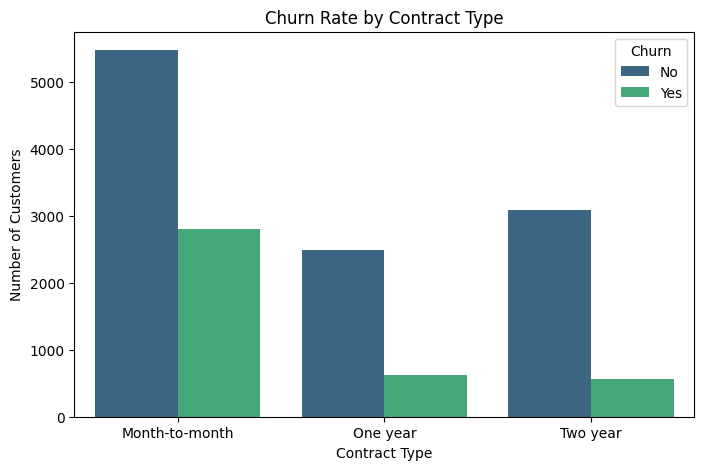

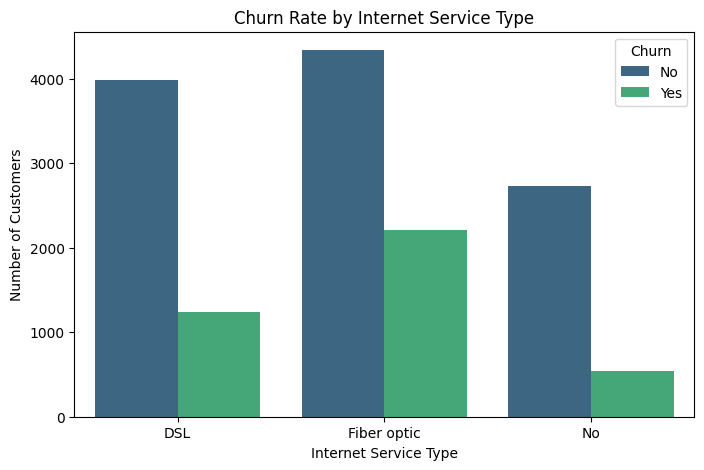

In [ ]:
# Visualize Churn rate by Contract type
plt.figure(figsize=(8, 5))
sns.countplot(data=churn_df, x='Contract', hue='Churn', palette='viridis')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()

# Visualize Churn rate by Internet Service type
plt.figure(figsize=(8, 5))
sns.countplot(data=churn_df, x='InternetService', hue='Churn', palette='viridis')
plt.title('Churn Rate by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.show()

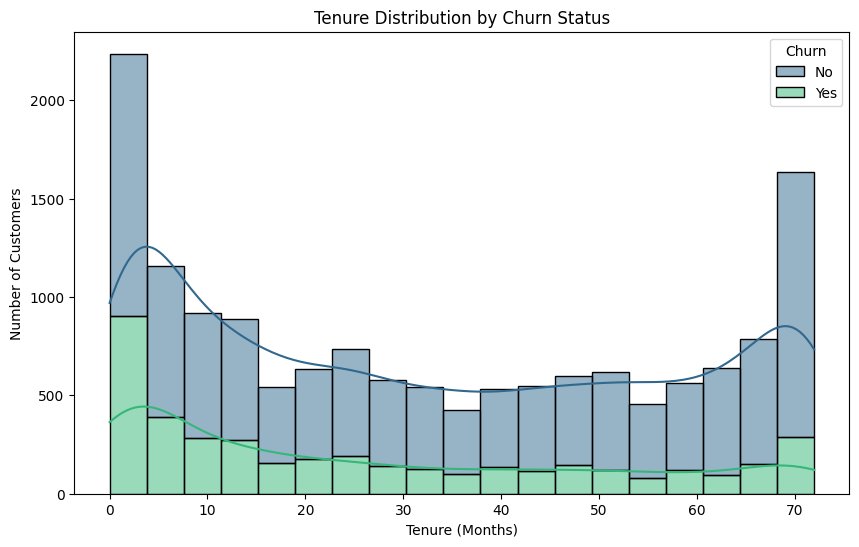

/tmp/ipython-input-251826506.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=churn_df, x='Churn', y='tenure', palette='viridis')


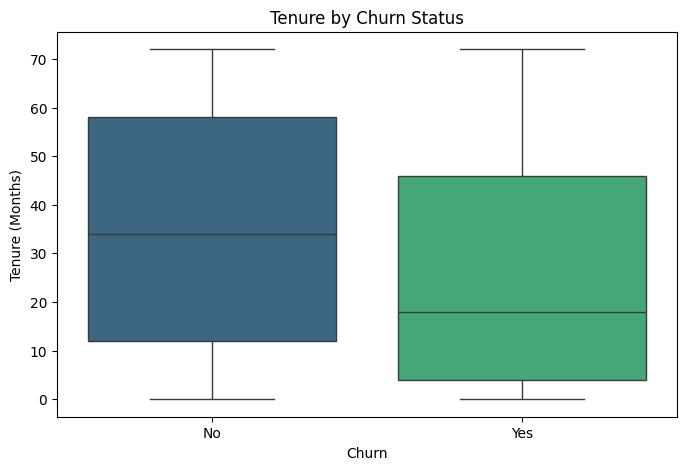

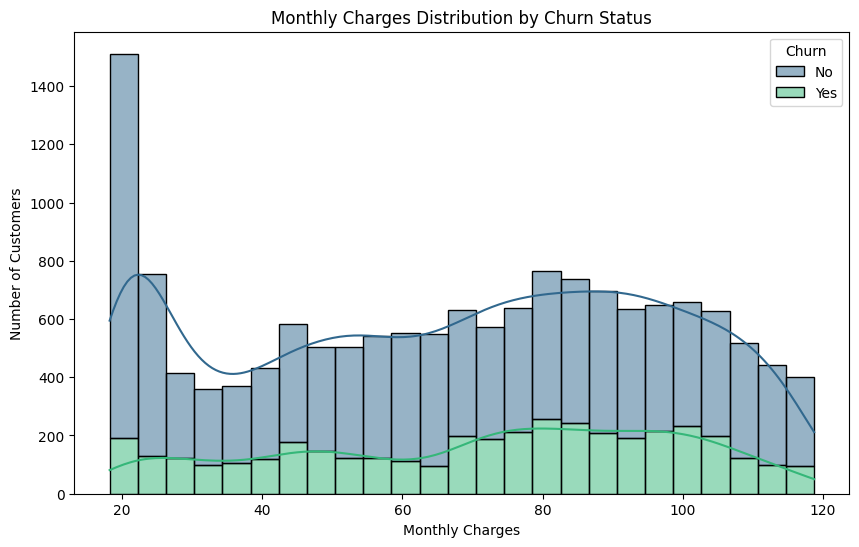

/tmp/ipython-input-251826506.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=churn_df, x='Churn', y='MonthlyCharges', palette='viridis')


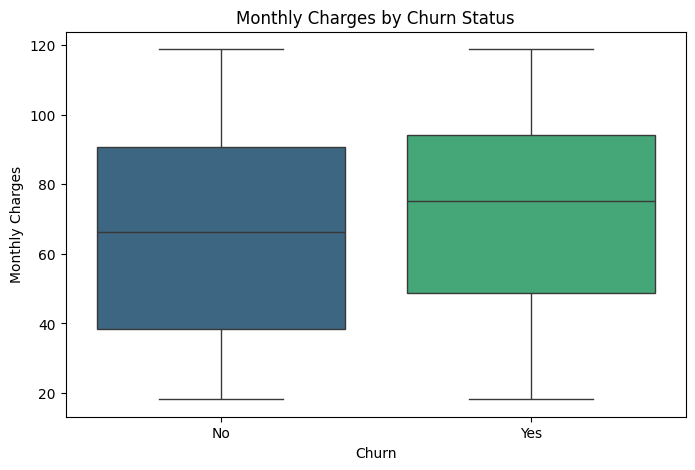

In [ ]:
# Visualize Tenure distribution for churned vs. not churned customers (Histograms)
plt.figure(figsize=(10, 6))
sns.histplot(data=churn_df, x='tenure', hue='Churn', multiple='stack', kde=True, palette='viridis')
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()

# Visualize Tenure distribution for churned vs. not churned customers (Boxplots)
plt.figure(figsize=(8, 5))
sns.boxplot(data=churn_df, x='Churn', y='tenure', palette='viridis')
plt.title('Tenure by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()

# Visualize MonthlyCharges distribution for churned vs. not churned customers (Histograms)
plt.figure(figsize=(10, 6))
sns.histplot(data=churn_df, x='MonthlyCharges', hue='Churn', multiple='stack', kde=True, palette='viridis')
plt.title('Monthly Charges Distribution by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.show()

# Visualize MonthlyCharges distribution for churned vs. not churned customers (Boxplots)
plt.figure(figsize=(8, 5))
sns.boxplot(data=churn_df, x='Churn', y='MonthlyCharges', palette='viridis')
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

Based on the Exploratory Data Analysis we've conducted so far, here are a few key insights regarding customer churn:

1.   **Contract Type is a Strong Indicator:** Customers on month-to-month contracts have a significantly higher churn rate compared to those with one-year or two-year contracts. This suggests that longer-term contracts are associated with higher customer retention.
2.   **Internet Service Type Matters:** Customers with Fiber optic internet service appear to churn more frequently than those with DSL or no internet service. This could indicate potential issues with the Fiber optic service or customer satisfaction among that group.
3.   **Tenure and Churn are Inversely Related:** Customers with shorter tenures are more likely to churn. This aligns with the expectation that newer customers are at a higher risk of leaving, while long-term customers tend to be more loyal.
4.   **Higher Monthly Charges are Associated with Higher Churn:** Customers with higher monthly bills tend to have a greater propensity to churn. This could be due to price sensitivity or dissatisfaction with the value received for the cost.
5.   **Class Imbalance Exists:** The dataset is imbalanced, with a higher number of non-churned customers compared to churned customers. This is an important consideration for model evaluation, where metrics beyond simple accuracy will be crucial.


## Feature Engineering & Preprocessing

###Encoding Categorical Variables

In [ ]:
# Identify categorical columns to encode (excluding 'Churn' which is the target)
categorical_cols = churn_df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Churn') # Exclude the target variable

print("Categorical columns to encode:", categorical_cols)

# Handle binary columns by mapping Yes/No to 1/0
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'] # Assuming these are Yes/No

for col in binary_cols:
    if col in categorical_cols:
        churn_df[col] = churn_df[col].map({'Yes': 1, 'No': 0})
        categorical_cols.remove(col) # Remove from the list of columns for one-hot encoding

# Handle other binary columns with 3 unique values like 'MultipleLines', 'OnlineSecurity', etc.
# These have 'Yes', 'No', and 'No phone service' or 'No internet service'.
# We can treat these as nominal for one-hot encoding, or map 'No service' to a specific value if appropriate.
# For now, let's include them in one-hot encoding if they are not in the initial binary_cols list.
# Let's double check the unique values for remaining object columns
print("\nRemaining categorical columns for One-Hot Encoding (after handling binary mapping):", categorical_cols)
for col in categorical_cols:
    print(f"Unique values for '{col}': {churn_df[col].unique()}")


# One-Hot Encode the remaining nominal categorical columns
churn_df = pd.get_dummies(churn_df, columns=categorical_cols, drop_first=True) # drop_first=True to avoid multicollinearity

# Map the target variable 'Churn' to 0 and 1
churn_df['Churn'] = churn_df['Churn'].map({'Yes': 1, 'No': 0})

# Display the first few rows and the new shape to see the encoded features
display(churn_df.head())
print("\nShape of DataFrame after encoding:", churn_df.shape)

Categorical columns to encode: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Remaining categorical columns for One-Hot Encoding (after handling binary mapping): ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
Unique values for 'gender': ['Female' 'Male']
Unique values for 'MultipleLines': ['No phone service' 'No' 'Yes']
Unique values for 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique values for 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Unique values for 'OnlineBackup': ['Yes' 'No' 'No internet service']
Unique values for 'DeviceProtection': ['No' 'Yes' 'No internet service']
Unique values for 'TechSupport': ['No' 'Yes' 'No internet service']
Unique 

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,False,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,0,True,...,False,False,False,False,False,True,False,False,False,True
2,0,0,0,2,1,1,53.85,108.15,1,True,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0,45,0,0,42.30,1840.75,0,True,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,2,1,1,70.70,151.65,1,False,...,False,False,False,False,False,False,False,False,True,False



Shape of DataFrame after encoding: (15043, 31)


### Prepare Final Dataset

In [ ]:
# Replace missing values in 'TotalCharges' with 0
churn_df['TotalCharges'].fillna(0, inplace=True)

# Verify that there are no more missing values in 'TotalCharges'
print("Missing values after imputation:")
print(churn_df.isnull().sum()['TotalCharges'])

# Now define X and y
X = churn_df.drop('Churn', axis=1) # Features
y = churn_df['Churn'] # Target variable

# Ensure X and y have the same number of rows
print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)

# Ensure all features in X are numeric (after encoding and imputation)
print("\nData types of features in X:")
print(X.dtypes.unique())

Missing values after imputation:
0

Shape of X: (15043, 30)
Shape of y: (15043,)

Data types of features in X:
[dtype('int64') dtype('float64') dtype('bool')]


/tmp/ipython-input-2295842361.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn_df['TotalCharges'].fillna(0, inplace=True)


## Split dataset into training and testing datasets

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Print the shapes to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (11282, 30)
Shape of X_test: (3761, 30)
Shape of y_train: (11282,)
Shape of y_test: (3761,)


## Model Training (Decision Tree & Random Forest)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

print("Decision Tree model trained successfully!")

Decision Tree model trained successfully!


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


# Model Evaluation

##Predictions

In [ ]:
# Get predictions for the test set using the Decision Tree model
y_pred_tree = tree_model.predict(X_test)

# Get predictions for the test set using the Random Forest model
y_pred_rf = rf_model.predict(X_test)

print("Predictions made successfully for both Decision Tree and Random Forest models.")

Predictions made successfully for both Decision Tree and Random Forest models.


## Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for Decision Tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy of Decision Tree model: {accuracy_tree:.4f}")

# Calculate accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest model: {accuracy_rf:.4f}")

Accuracy of Decision Tree model: 0.7519
Accuracy of Random Forest model: 0.7551


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for Decision Tree
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Compute confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix for Decision Tree:")
print(conf_matrix_tree)
print("\nLabels:")
print("True Positives (TP): correctly predicted churns (the model caught a churner).")
print("True Negatives (TN): correctly predicted non-churns.")
print("False Positives (FP): predicted churn but customer stayed (could lead to unnecessary retention offers).")
print("False Negatives (FN): predicted stay but customer churned (missed opportunity to retain).")


print("\nConfusion Matrix for Random Forest:")
print(conf_matrix_rf)
print("\nLabels:")
print("True Positives (TP): correctly predicted churns (the model caught a churner).")
print("True Negatives (TN): correctly predicted non-churns.")
print("False Positives (FP): predicted churn but customer stayed (could lead to unnecessary retention offers).")
print("False Negatives (FN): predicted stay but customer churned (missed opportunity to retain).")

Confusion Matrix for Decision Tree:
[[2616  146]
 [ 787  212]]

Labels:
True Positives (TP): correctly predicted churns (the model caught a churner).
True Negatives (TN): correctly predicted non-churns.
False Positives (FP): predicted churn but customer stayed (could lead to unnecessary retention offers).
False Negatives (FN): predicted stay but customer churned (missed opportunity to retain).

Confusion Matrix for Random Forest:
[[2630  132]
 [ 789  210]]

Labels:
True Positives (TP): correctly predicted churns (the model caught a churner).
True Negatives (TN): correctly predicted non-churns.
False Positives (FP): predicted churn but customer stayed (could lead to unnecessary retention offers).
False Negatives (FN): predicted stay but customer churned (missed opportunity to retain).


## Precision, Recall, F1

In [ ]:
from sklearn.metrics import classification_report

# Get classification report for Decision Tree
classification_report_tree = classification_report(y_test, y_pred_tree)

# Get classification report for Random Forest
classification_report_rf = classification_report(y_test, y_pred_rf)

print("Classification Report for Decision Tree:")
print(classification_report_tree)

print("\nClassification Report for Random Forest:")
print(classification_report_rf)

print("\nExplanation of Metrics (focused on Churn = 1 class):")
print("Precision (for Churn=1): Of the customers predicted to churn, how many actually churned? A high precision means fewer non-churned customers are incorrectly flagged as churners (reducing wasted retention efforts).")
print("Recall (for Churn=1): Of all the customers who actually churned, how many did the model correctly identify? A high recall means fewer actual churners are missed (important for proactive retention).")
print("F1-Score: The harmonic mean of precision and recall for the Churn=1 class. It provides a single score that balances both precision and recall, useful when you need a balance between minimizing false positives and false negatives for churn prediction.")

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      2762
           1       0.59      0.21      0.31       999

    accuracy                           0.75      3761
   macro avg       0.68      0.58      0.58      3761
weighted avg       0.72      0.75      0.71      3761


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      2762
           1       0.61      0.21      0.31       999

    accuracy                           0.76      3761
   macro avg       0.69      0.58      0.58      3761
weighted avg       0.73      0.76      0.71      3761


Explanation of Metrics (focused on Churn = 1 class):
Precision (for Churn=1): Of the customers predicted to churn, how many actually churned? A high precision means fewer non-churned customers are incorrectly flagged as churners (reducing wasted retention effort

## Compare Models

Based on the classification reports we generated:

The **Decision Tree model** had a **Recall of 0.21 for the Churn=1 class**.
The **Random Forest model** also had a **Recall of 0.21 for the Churn=1 class**.
In this specific case, **both models performed identically** in terms of recall for the churned class. Neither model significantly outperformed the other in capturing actual churners on this test set.

While Random Forests often do outperform single Decision Trees due to their ensemble nature (combining multiple trees to reduce variance and improve robustness), in this particular evaluation on this dataset and split, they had the same recall for the churn class.

This highlights that while general expectations exist about model performance, it's crucial to evaluate them empirically on your specific dataset to see how they actually perform.


## Interpretation:

**Business impact of False Negatives and False Positives:**


*   **False Negatives (FN) - Missed Churners:** These are customers who actually churned, but your model predicted they would stay.
    *   **Business Impact:** This is often the most costly error in churn prediction. When you miss a churner, the company loses that customer's future revenue entirely. There's no opportunity to intervene with a retention offer or address their issues. The cost is the lost customer lifetime value.
    *   **Relation to Recall:** A high Recall is crucial for minimizing False Negatives. If you prioritize recall, you are focused on catching as many actual churners as possible, even if it means also incorrectly flagging some non-churners (increasing False Positives).
*   **False Positives (FP) - Incorrectly Flagged as Churners:** These are customers who would have stayed, but your model predicted they would churn.
    *   **Business Impact:** These lead to potentially unnecessary retention efforts or offers. If you offer a discount or incentive to a customer who wasn't going to leave anyway, you might reduce revenue unnecessarily. While not ideal, this cost is typically less severe than the complete loss of a customer due to a False Negative.
    *   **Relation to Precision:** A high Precision is important for minimizing False Positives. If you prioritize precision, you are focused on ensuring that when the model predicts churn, it is very likely to be correct, even if it means missing some actual churners.

**Balancing Precision and Recall:**
There's often a trade-off between precision and recall.
*   If you want to be very sure that any customer you flag for a retention campaign is highly likely to churn (minimize wasted effort - lower FP), you prioritize **Precision**.
*   If you want to make sure you catch as many actual churners as possible, even if it means contacting some customers who wouldn't have churned (minimize lost customers - lower FN), you prioritize **Recall**.

The **F1-Score** is a useful metric because it provides a single value that is the harmonic mean of precision and recall. It helps you find a balance between minimizing both types of errors. If the business cost of False Negatives is significantly higher than False Positives, you might lean towards a model with slightly lower precision but higher recall, or explore techniques that allow you to optimize directly for recall or use cost-sensitive learning.

## Feature Importance and Interpretation

In [ ]:
# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Create a pandas Series for easier handling and sorting
feature_importance_series = pd.Series(feature_importances, index=feature_names)

# Sort the features by importance in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Display the top 5 most important features
print("Top 5 Most Important Features for Churn Prediction (Random Forest):")
print(sorted_feature_importances.head())

Top 5 Most Important Features for Churn Prediction (Random Forest):
TotalCharges      0.168849
MonthlyCharges    0.166314
tenure            0.140753
gender_Male       0.029191
Partner           0.026673
dtype: float64


## Insights and Recommendations

Based on our Exploratory Data Analysis and the feature importances from the Random Forest model, here is a brief summary of the key factors that seem to influence customer churn in this dataset:

**Key Factors Influencing Churn:**

**Tenure:** Customers with shorter tenures are significantly more likely to churn. Loyalty built over time is a strong deterrent to leaving.
**Billing Information:** Higher Monthly Charges and consequently higher Total Charges are strongly associated with increased churn. Customers paying more seem to be at a higher risk.
**Contract Type:** While not in the absolute top 5 features by model importance, our EDA clearly showed that customers on Month-to-month contracts have a much higher churn rate than those with longer-term commitments (One year or Two year). This is a crucial factor.
**Internet Service:** Customers with Fiber optic internet service also showed a higher propensity to churn in the EDA, suggesting potential service-related issues or expectations in this segment.
**Demographics:** Features like Gender and Partner also showed some importance in the model, indicating that demographic factors play a role, though perhaps less significant than tenure and billing.

In essence, customers who are newer, pay higher monthly fees, and are on month-to-month contracts (especially those with Fiber optic internet) appear to be at the highest risk of churning.

**Business Recommendations to Reduce Churn:**

1.   **Target Early Tenure Customers:** Since customers with shorter tenures are at higher risk, focus retention efforts on customers within their first year or two. Consider proactive outreach, welcome programs, or early loyalty incentives to build stickiness from the start.
2.   **Promote Longer-Term Contracts:** Given the significantly lower churn rate for customers on one-year or two-year contracts, actively encourage month-to-month customers to switch to longer-term plans. This could involve offering discounts, bundled services, or other benefits for signing a contract.
3.   **Analyze High Monthly Charge Customers:** Customers with higher monthly bills have a greater propensity to churn. Investigate why these customers are leaving. Are they finding better value elsewhere? Are there issues with the perceived value of the service at that price point? Consider loyalty discounts, bundled premium services, or personalized check-ins for high-value customers.
4.   **Address Fiber Optic Service Issues (if applicable):** The higher churn rate among Fiber optic customers suggests there might be specific issues related to this service (e.g., reliability, customer support for fiber, unmet expectations). The company should investigate customer feedback and technical performance for Fiber optic service and take steps to improve satisfaction in this segment.
5.   **Implement Targeted Retention Campaigns:** Instead of generic offers, use the insights from your model and EDA to create targeted campaigns. For example:
    *   Offer contract incentives to month-to-month customers with low tenure.
    *   Provide proactive support or service checks for Fiber optic customers experiencing issues.
    *   **Reach out to customers with high monthly charges who show other signs of being at risk.
6.   **Leverage Feature Importance for Action:** Use the identified important features (Tenure, Billing, Contract Type, potentially Gender/Partner, and Internet Service) to build dashboards or reports that allow the marketing and customer success teams to identify at-risk customers and tailor their interactions.

By focusing on these key areas identified in the data, the company can implement more effective and targeted churn prevention strategies.

